# DATOS

In [15]:
# Import de bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv("Crimenes.csv")
X = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

In [3]:
fips_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
df['code'] = df['Estado'].map(fips_codes.set_index('state')['code'])
df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,code
0,Alabama,13.2,236,58,21.2,AL
1,Alaska,10.0,263,48,44.5,AK
2,Arizona,8.1,294,80,31.0,AZ
3,Arkansas,8.8,190,50,19.5,AR
4,California,9.0,276,91,40.6,CA


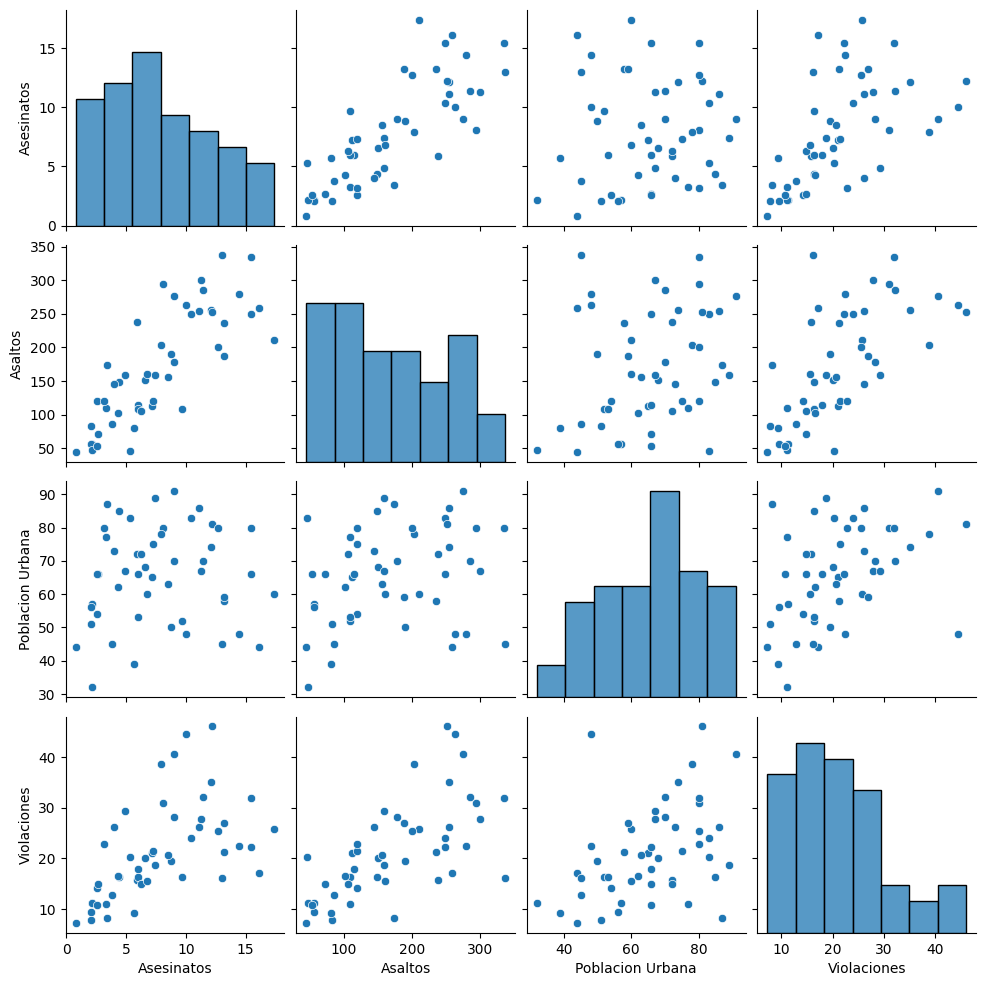

In [4]:
sns.pairplot(X)
plt.show()

# KMEANS

c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

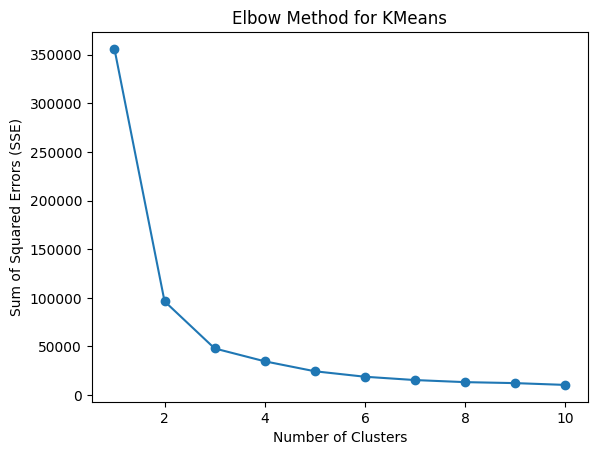

In [5]:
sse = []

# Probamos con un rango de valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficamos el método del codo
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


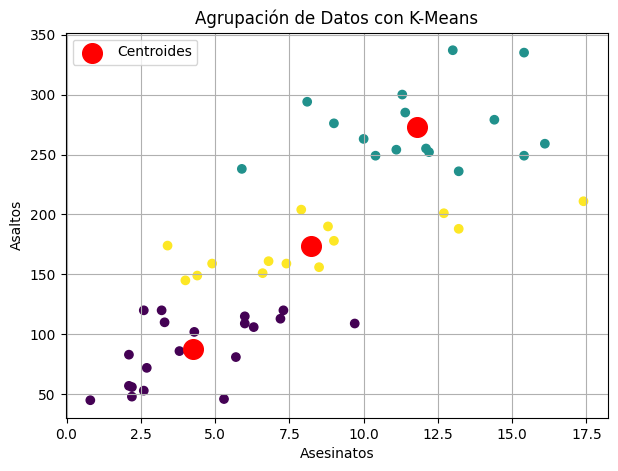

In [6]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(7, 5))
plt.scatter(X['Asesinatos'], X['Asaltos'], c = clusters, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', marker = 'o', label = 'Centroides')

plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.title('Agrupación de Datos con K-Means')
plt.grid(True)
plt.legend()
plt.show()

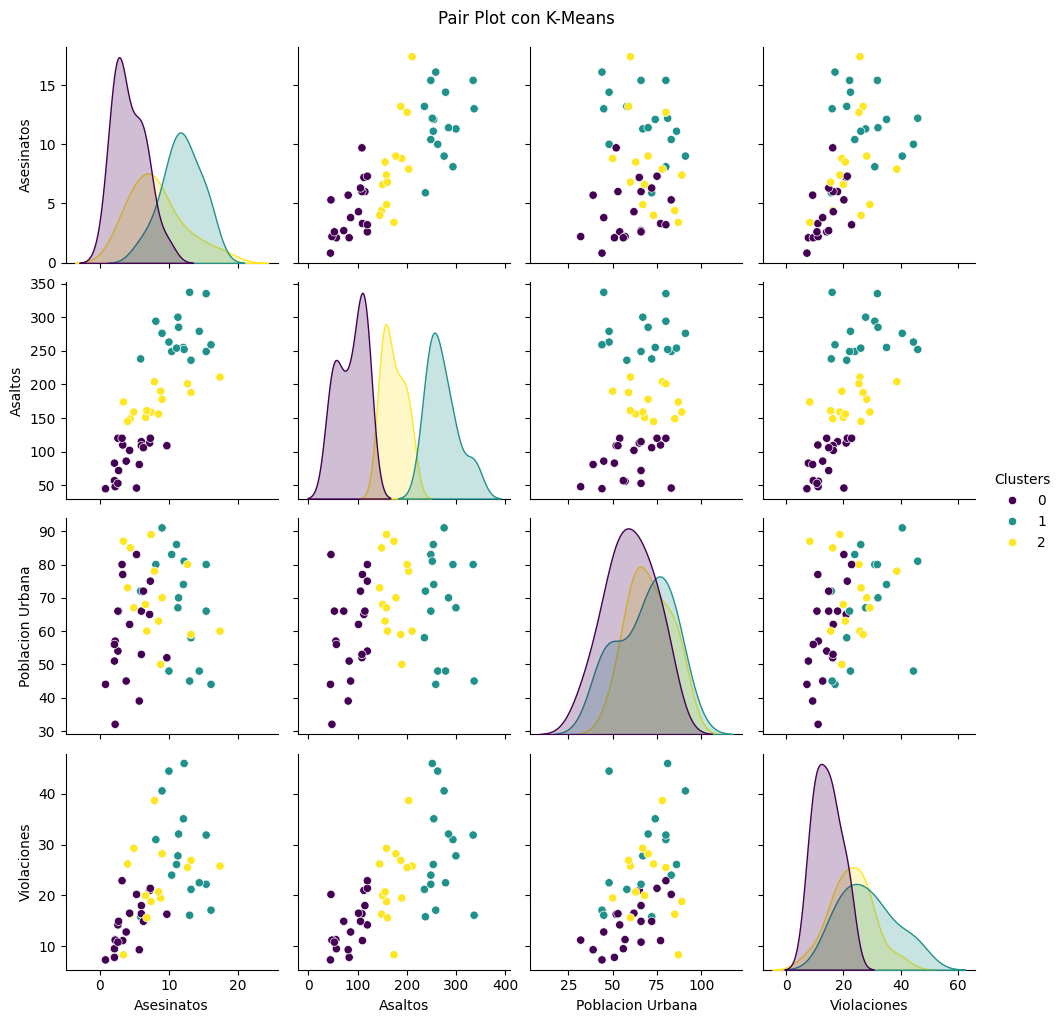

In [7]:
XKmeans = X.copy()
XKmeans["Clusters"] = clusters

sns.pairplot(XKmeans, hue='Clusters', palette='viridis')
plt.suptitle('Pair Plot con K-Means', y=1.02)
plt.show()

In [8]:
XKmeans["Estado"] = df["code"]
mapeo_etiquetas = {0: 'Seguro', 1: 'Peligroso', 2: 'Alerta'}
XKmeans['Seguridad'] = XKmeans['Clusters'].map(mapeo_etiquetas)
XKmeans.head()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Clusters,Estado,Seguridad
0,13.2,236,58,21.2,1,AL,Peligroso
1,10.0,263,48,44.5,1,AK,Peligroso
2,8.1,294,80,31.0,1,AZ,Peligroso
3,8.8,190,50,19.5,2,AR,Alerta
4,9.0,276,91,40.6,1,CA,Peligroso


In [9]:
fig = px.choropleth(
    XKmeans,
    locations='Estado',
    locationmode='USA-states',
    color='Seguridad',
    scope='usa',
    color_discrete_sequence=["red", "yellow", "green"],
)

fig.update_layout(title_text='Mapa de Clusters')
fig.show()

# MEAN SHIFT

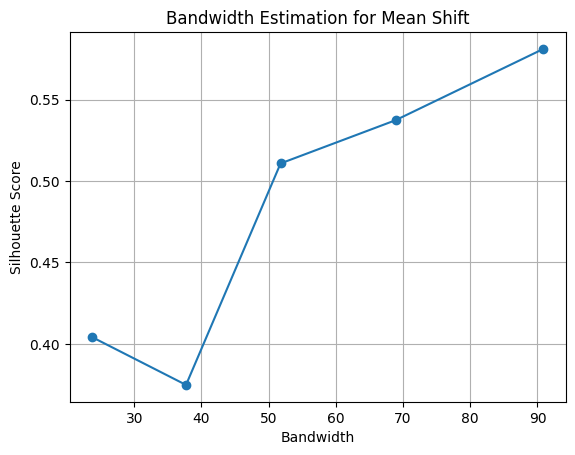

In [10]:
bandwidths = []
silhouettes = []
quantiles = np.arange(0.1, 0.6, 0.1)

for quantile in quantiles:
    bandwidth = estimate_bandwidth(X, quantile = quantile)
    bandwidths.append(bandwidth)
    ms = MeanShift(bandwidth=bandwidth).fit(X)
    if len(np.unique(ms.labels_)) > 1:
        sil_score = silhouette_score(X, ms.labels_)
        silhouettes.append(sil_score)
    else:
        silhouettes.append(-1)

plt.plot(bandwidths, silhouettes, 'o-')
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Score")
plt.title("Bandwidth Estimation for Mean Shift")
plt.grid(True)
plt.show()


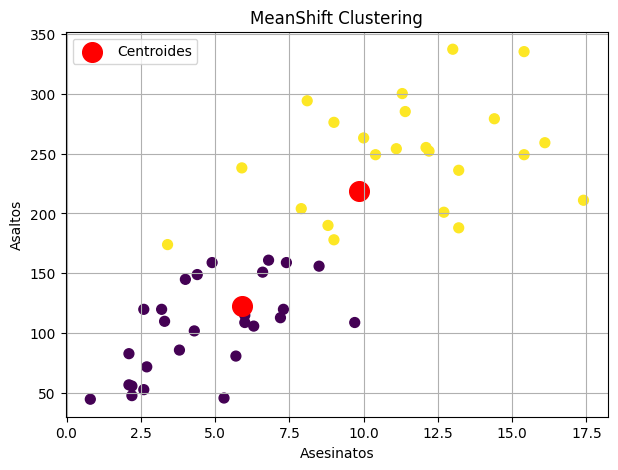

In [11]:
MShift = MeanShift(bandwidth = 90).fit(X)
labels = MShift.labels_

plt.figure(figsize=(7, 5))
plt.scatter(X["Asesinatos"], X["Asaltos"], c = labels, s = 50, cmap='viridis')
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], s = 200, c = 'red', marker = 'o', label = 'Centroides')

plt.title(f'MeanShift Clustering')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.grid(True)
plt.legend()
plt.show()

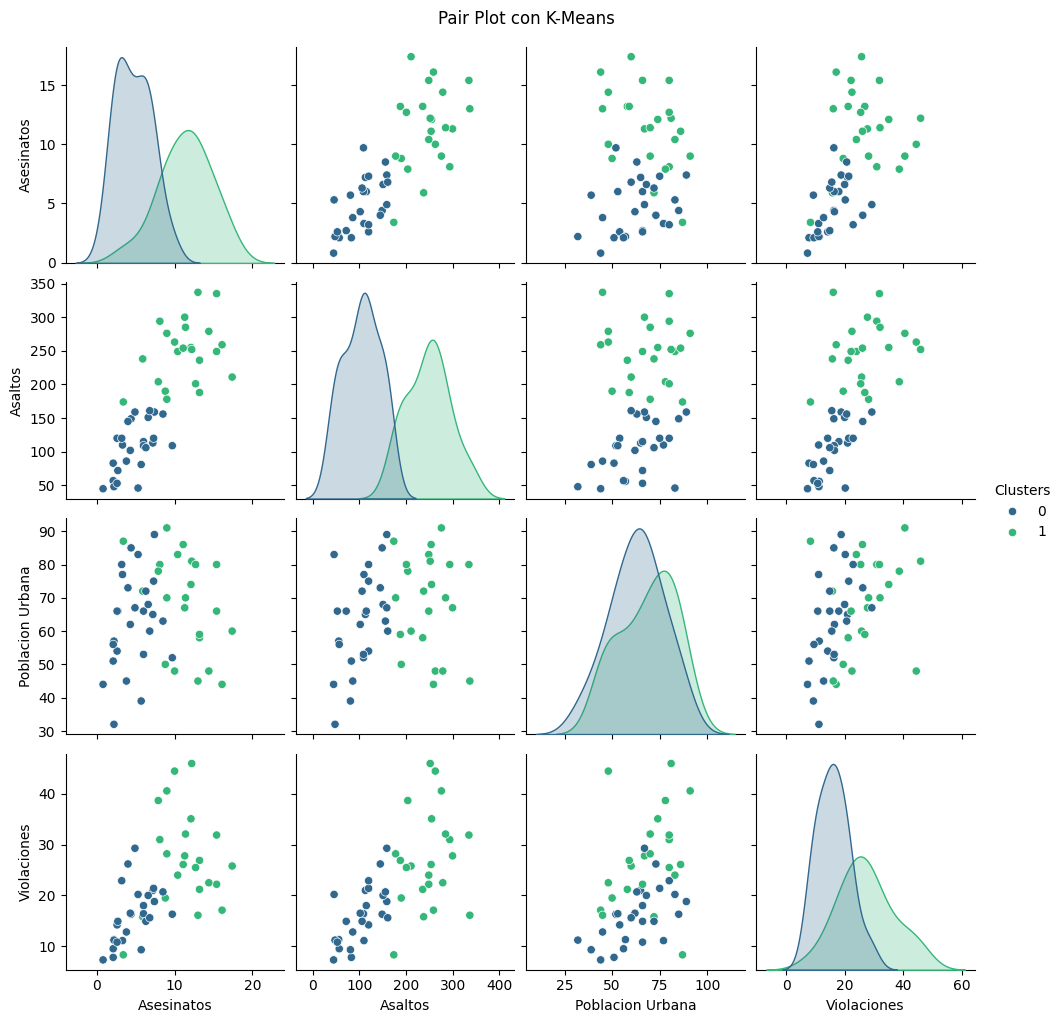

In [12]:
XMShift = X.copy()
XMShift["Clusters"] = labels

sns.pairplot(XMShift, hue='Clusters', palette='viridis')
plt.suptitle('Pair Plot con K-Means', y=1.02)
plt.show()

In [13]:
XMShift["Estado"] = df["code"]
mapeo_etiquetas = {0: 'Seguro', 1: 'Peligroso'}
XMShift['Seguridad'] = XMShift['Clusters'].map(mapeo_etiquetas)
XMShift.head()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Clusters,Estado,Seguridad
0,13.2,236,58,21.2,1,AL,Peligroso
1,10.0,263,48,44.5,1,AK,Peligroso
2,8.1,294,80,31.0,1,AZ,Peligroso
3,8.8,190,50,19.5,1,AR,Peligroso
4,9.0,276,91,40.6,1,CA,Peligroso


In [14]:
fig = px.choropleth(
    XMShift,
    locations='Estado',
    locationmode='USA-states',
    color='Seguridad',
    scope='usa',
    color_discrete_sequence=["red", "green"],
)

fig.update_layout(title_text='Mapa de Clusters')
fig.show()

# DBSCAN

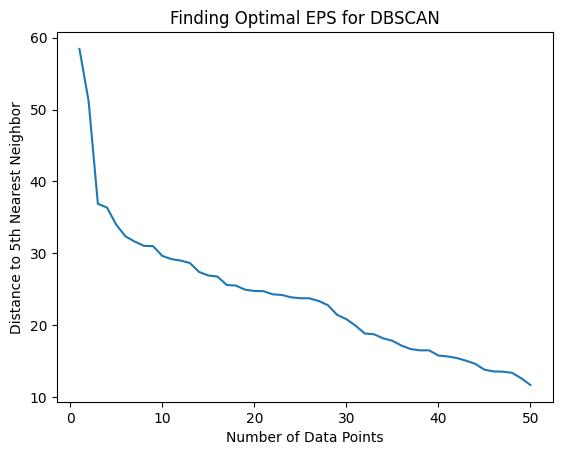

In [16]:
nn = NearestNeighbors(n_neighbors = 5)
nbrs = nn.fit(X)
distances, indices = nbrs.kneighbors(X)
# Ordena las distancias y plotea
distanceDec = sorted(distances[:, 5-1], reverse=True)
plt.plot(list(range(1, len(distanceDec) + 1)), distanceDec)
plt.xlabel("Number of Data Points")
plt.ylabel("Distance to " + str(5) + "th Nearest Neighbor")
plt.title("Finding Optimal EPS for DBSCAN")
plt.show()